# Emotional Analysis
## EmoBank Dataset labelled with Plutchik model emotions - Antonio Pagnotta

In [88]:
import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv('p_emotion.csv')

In [90]:
data.head()

,V,A,D,text,predicted_emotion
0,3.00,3.00,3.20,"Remember what she said in my last letter? """,surprise
1,2.80,3.10,2.80,If I wasn't working here.,sadness
2,3.00,3.00,3.00,"..""",surprise
3,3.44,3.00,3.22,Goodwill helps people get off of public assist...,joy
4,3.55,3.27,3.46,Sherry learned through our Future Works class ...,joy


In [91]:
print("Dataset shape: ")
print(data.shape)

Dataset shape: 
(10062, 5)


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062 entries, 0 to 10061
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   V                  10062 non-null  float64
 1   A                  10062 non-null  float64
 2   D                  10062 non-null  float64
 3   text               10061 non-null  object 
 4   predicted_emotion  10062 non-null  object 
dtypes: float64(3), object(2)
memory usage: 393.2+ KB


Rimuoviamo la colonna 'text', non è rilevante per l'analisi (poiché le frasi sono già state classificate).

In [93]:
no_text_data = data[['V', 'A', 'D', 'predicted_emotion']]
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,surprise
1,2.80,3.10,2.80,sadness
2,3.00,3.00,3.00,surprise
3,3.44,3.00,3.22,joy
4,3.55,3.27,3.46,joy


Calcoliamo le statistiche descrittive per ogni emozione

In [94]:
for emotion in no_text_data['predicted_emotion'].unique():
    subset = no_text_data[no_text_data['predicted_emotion'] == emotion]
    print(f"Statistiche per '{emotion}':")
    print(subset[['V', 'A', 'D']].describe())

Statistiche per 'surprise':
                 V            A            D
count  1789.000000  1789.000000  1789.000000
mean      2.790911     3.086110     3.017306
std       0.335075     0.285135     0.245819
min       1.570000     2.090000     1.780000
25%       2.600000     2.900000     2.900000
50%       2.880000     3.000000     3.000000
75%       3.000000     3.220000     3.120000
max       4.300000     4.400000     4.200000
Statistiche per 'sadness':
                 V            A            D
count  1340.000000  1340.000000  1340.000000
mean      2.619761     3.068157     2.977052
std       0.326496     0.241016     0.234296
min       1.200000     2.200000     2.000000
25%       2.400000     2.900000     2.820000
50%       2.700000     3.000000     3.000000
75%       2.880000     3.200000     3.100000
max       3.700000     4.400000     4.000000
Statistiche per 'joy':
                 V            A            D
count  3763.000000  3763.000000  3763.000000
mean      3.191361    

Normalizziamo i valori di Valence, Arousal e Dominance

In [95]:
columns_to_normalize = ['V', 'A', 'D']
min_max = no_text_data[columns_to_normalize].apply(lambda column: (column.min(), column.max()))
for column in columns_to_normalize:
    min_val, max_val = min_max[column]
    no_text_data[column] = (no_text_data[column] - min_val) / (max_val - min_val)
print(no_text_data.head())

          V         A         D predicted_emotion
0  0.529412  0.461538  0.586777          surprise
1  0.470588  0.500000  0.421488           sadness
2  0.529412  0.461538  0.504132          surprise
3  0.658824  0.461538  0.595041               joy
4  0.691176  0.565385  0.694215               joy


/var/folders/vw/nm4pm2012rj1j5k7yc6x23bw0000gn/T/ipykernel_96539/267729564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_text_data[column] = (no_text_data[column] - min_val) / (max_val - min_val)


Controlliamo la distribuzione dei valori di Valence, Arousal e Dominance per ogni emozione

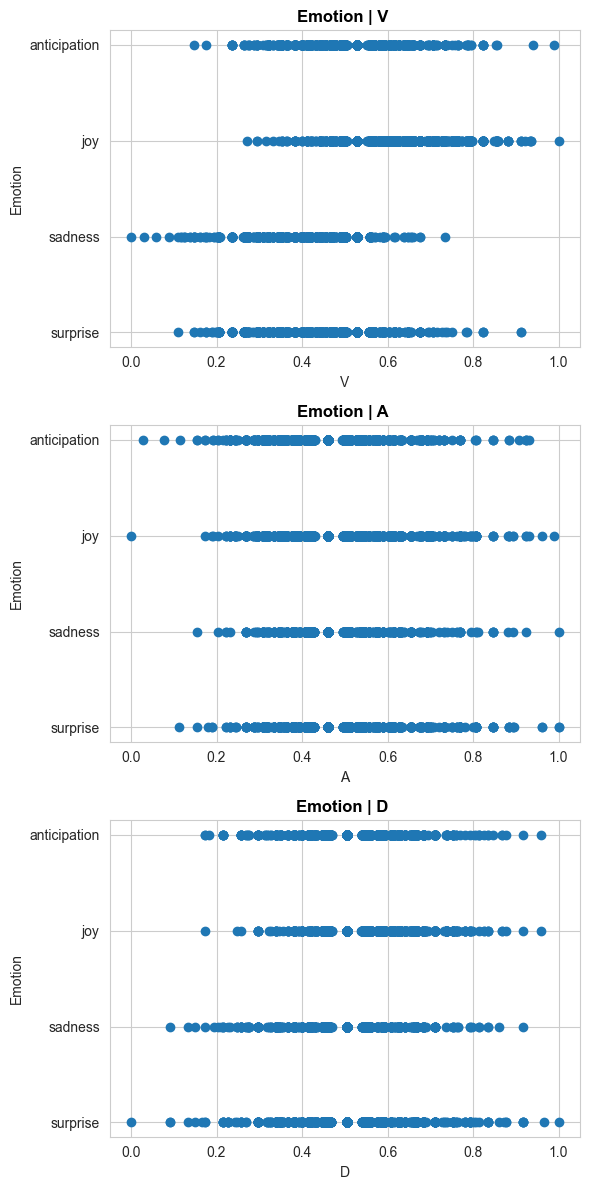

In [96]:
columns = ['V', 'A', 'D']
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for i, column in enumerate(columns):
    axs[i].plot(no_text_data[column], no_text_data['predicted_emotion'], 'o')
    axs[i].set_title(f'Emotion | {column} ', fontsize=12, fontweight='bold', color='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Emotion')
plt.tight_layout()
plt.show()

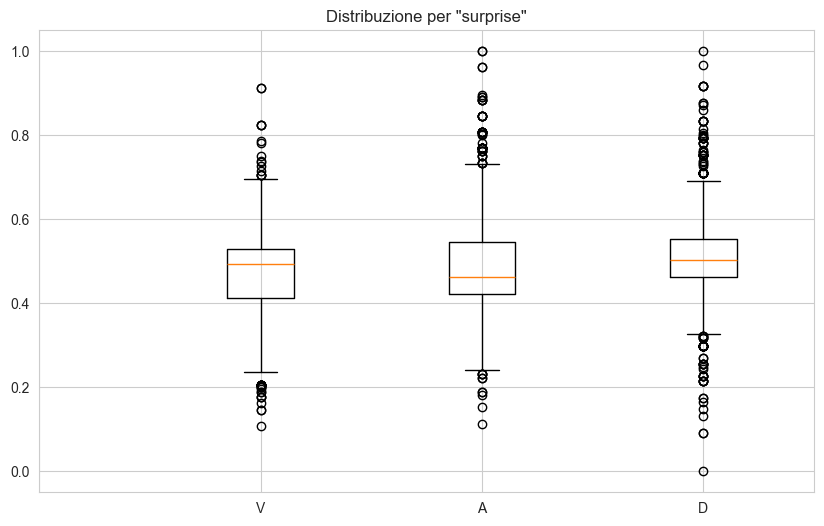

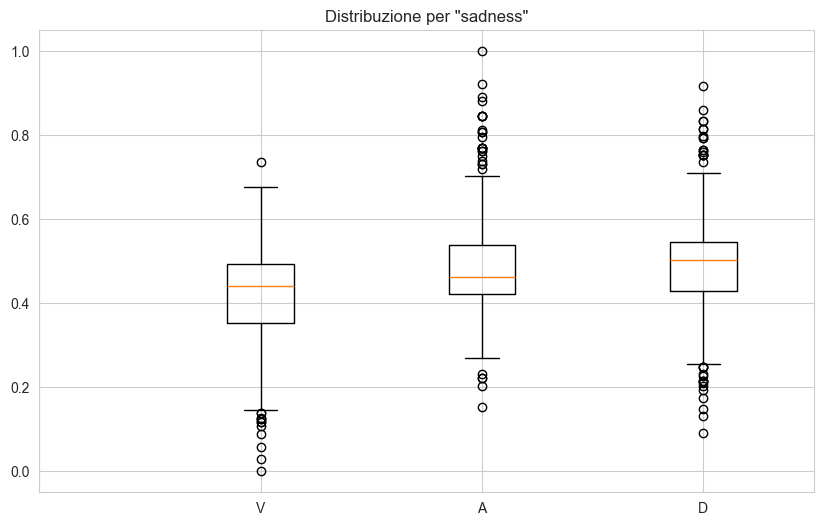

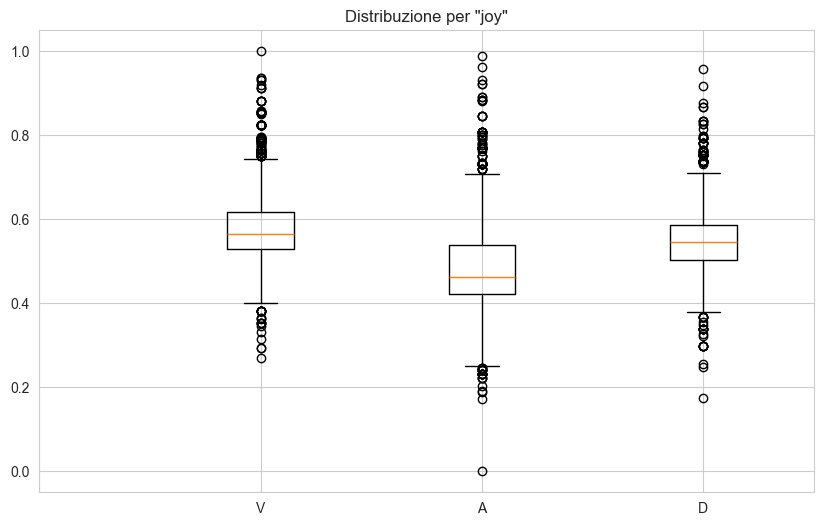

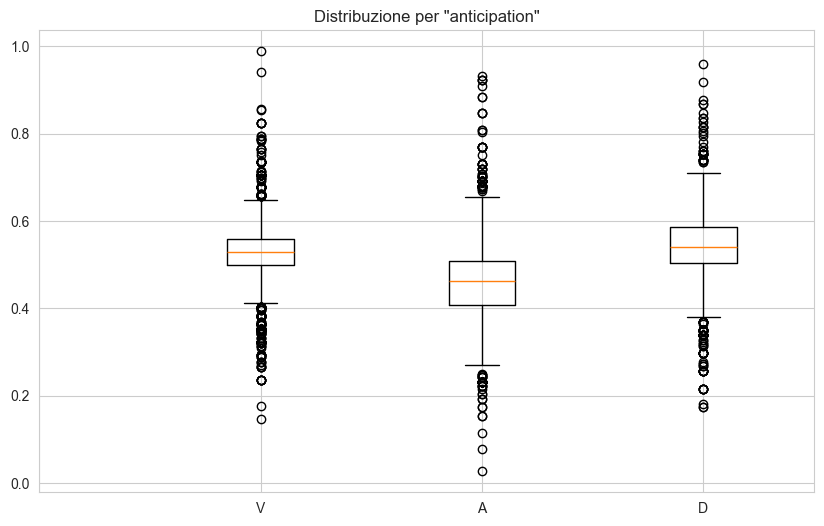

In [97]:
emotions = no_text_data['predicted_emotion'].unique()

for emot in emotions:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribuzione per "{emot}"')
    plt.boxplot([no_text_data[no_text_data['predicted_emotion'] == emot]['V'], no_text_data[no_text_data['predicted_emotion'] == emot]['A'], no_text_data[no_text_data['predicted_emotion'] == emot]['D']])
    plt.xticks([0, 1, 2, 3], [' ', 'V', 'A', 'D'])
    plt.show()

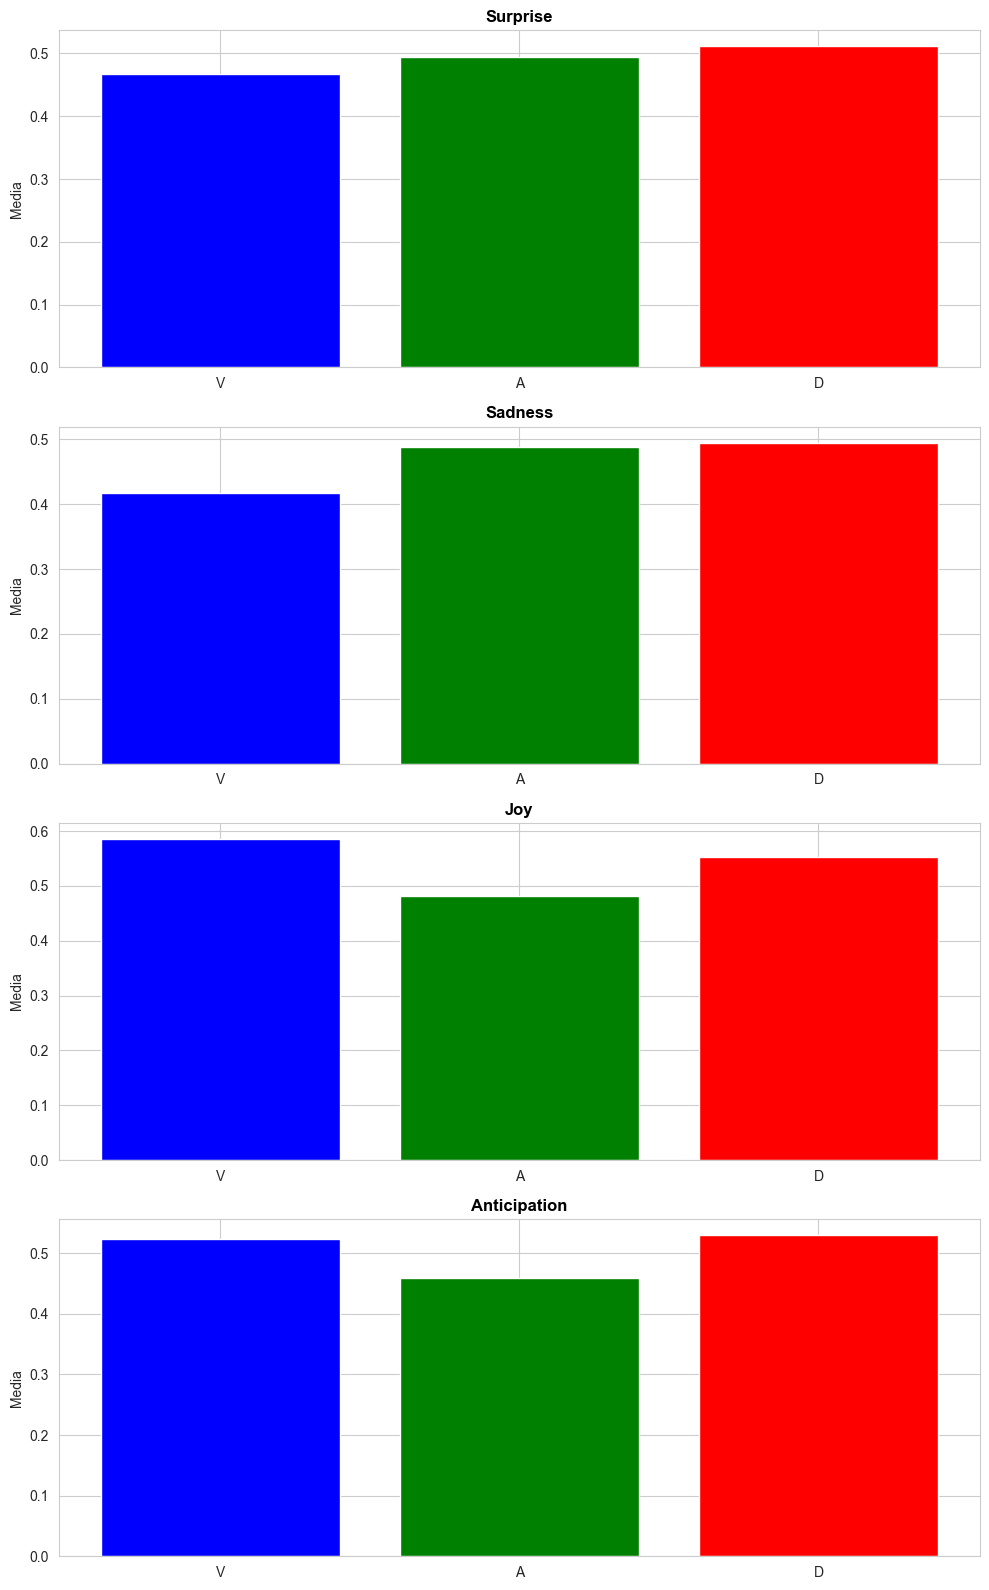

In [98]:
emotions = no_text_data['predicted_emotion'].unique()
fig, axs = plt.subplots(len(emotions), figsize=(10, 16))
for idx, emo in enumerate(emotions):
    filtered_df = no_text_data[no_text_data['predicted_emotion'] == emo]
    v_mean = filtered_df['V'].mean()
    a_mean = filtered_df['A'].mean()
    d_mean = filtered_df['D'].mean()
    axs[idx].bar(['V', 'A', 'D'], [v_mean, a_mean, d_mean], color=['blue', 'green', 'red'])
    axs[idx].set_title(f'{emo}'.capitalize(), fontweight='bold', color='black')
    axs[idx].set_ylabel('Media')
plt.tight_layout()
plt.show()

In [99]:
mean_values_by_emotion = no_text_data.groupby('predicted_emotion')[['V', 'A', 'D']].mean()
print(mean_values_by_emotion)

                          V         A         D
predicted_emotion                              
anticipation       0.522819  0.459321  0.529656
joy                0.585694  0.481300  0.551957
sadness            0.417577  0.487753  0.494650
surprise           0.467915  0.494658  0.511283


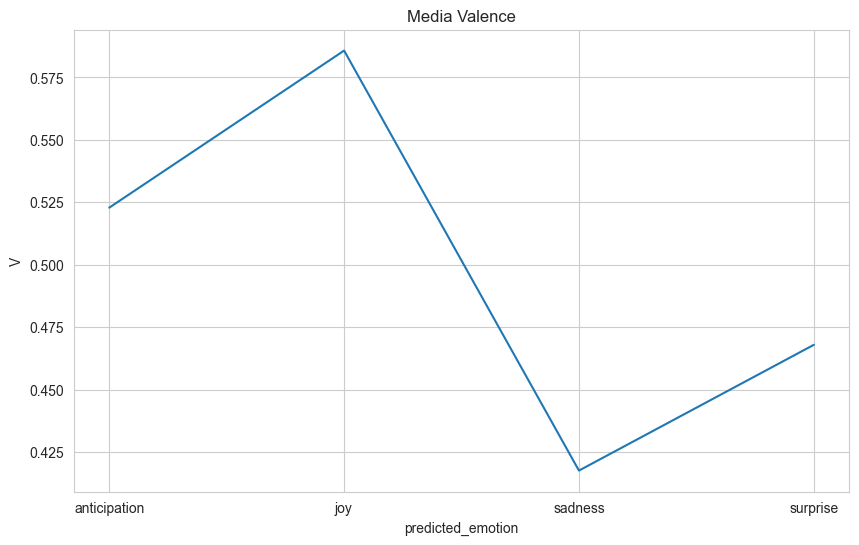

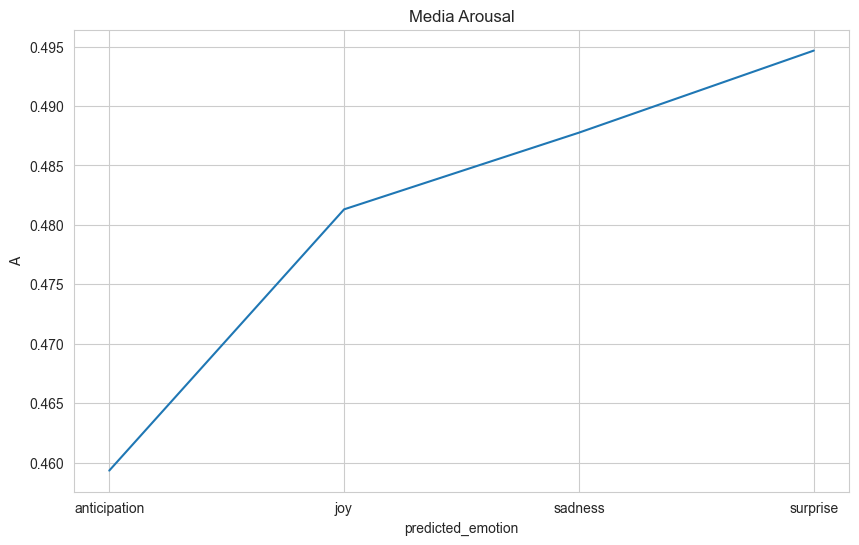

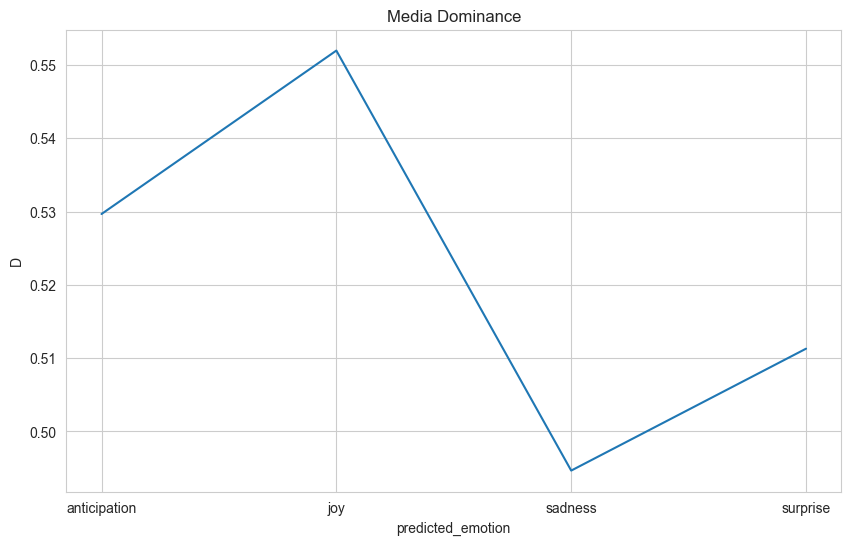

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Media Valence')
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='V')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Media Arousal')
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='A')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Media Dominance')
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='D')
plt.show()